k=1, 정확도= 71.00%
k=2, 정확도= 69.00%
k=3, 정확도= 77.00%
k=4, 정확도= 75.00%
k=5, 정확도= 75.00%
k=6, 정확도= 75.50%
k=7, 정확도= 78.50%
k=8, 정확도= 78.00%
k=9, 정확도= 80.50%
k=10, 정확도= 79.50%

 최적의 k: 9, 정확도:  80.50%
모델 저장 완료

 변수 중요도 (Permutation Importance)
kor: 중요도 = 0.0908, 표준편차 = 0.0203
eng: 중요도 = 0.0703, 표준편차 = 0.0177
math: 중요도 = 0.0695, 표준편차 = 0.0188
major_encoded: 중요도 = 0.0088, 표준편차 = 0.0121


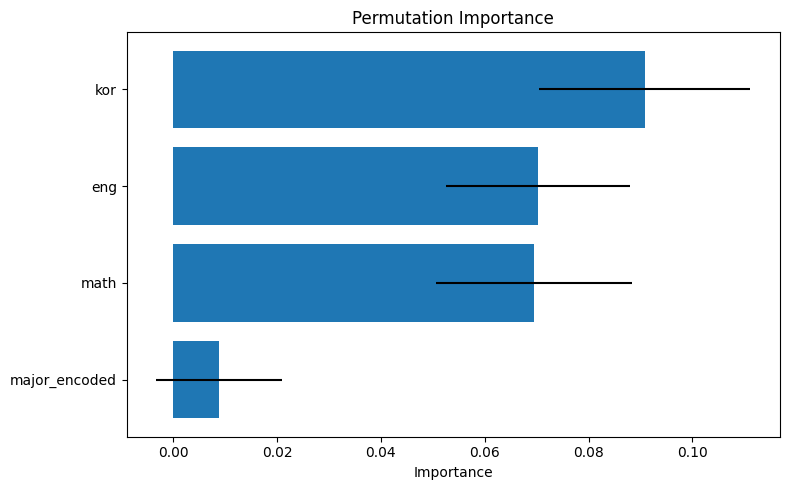

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import joblib

df = pd.read_csv('d:/data/admission/admission_data.csv')

le_major = LabelEncoder()
df['major_encoded'] = le_major.fit_transform(df['wish_major'])
df['result_encoded'] = df['result'].map({'불합격': 0, '합격': 1})

X = df[['kor', 'eng', 'math', 'major_encoded']]
y = df['result_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_k = 0
best_score = 0
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print(f'k={k}, 정확도={score: .2%}')
    if score > best_score:
        best_score = score
        best_k = k

print(f'\n 최적의 k: {best_k}, 정확도: {best_score: .2%}')

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

joblib.dump(best_knn, 'd:/data/admission/knn_model.pkl')
joblib.dump(le_major, 'd:/data/admission/major_encoder.pkl')
print("모델 저장 완료")

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(best_knn, X_test, y_test, n_repeats=30, random_state=42)

print("\n 변수 중요도 (Permutation Importance)")
for i in result.importances_mean.argsort()[::-1]:
    feature = X.columns[i]
    importance = result.importances_mean[i]
    std = result.importances_std[i]
    print(f"{feature}: 중요도 = {importance:.4f}, 표준편차 = {std:.4f}")

sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(8, 5))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], xerr=result.importances_std[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel("Importance")
plt.title("Permutation Importance")
plt.tight_layout()
plt.show()